# **PROJETO FINAL** 🚀

# ***TEMA: "Como acesso populacional a internet se relaciona as oportunidades disponiveis no mercado de tecnologia"***


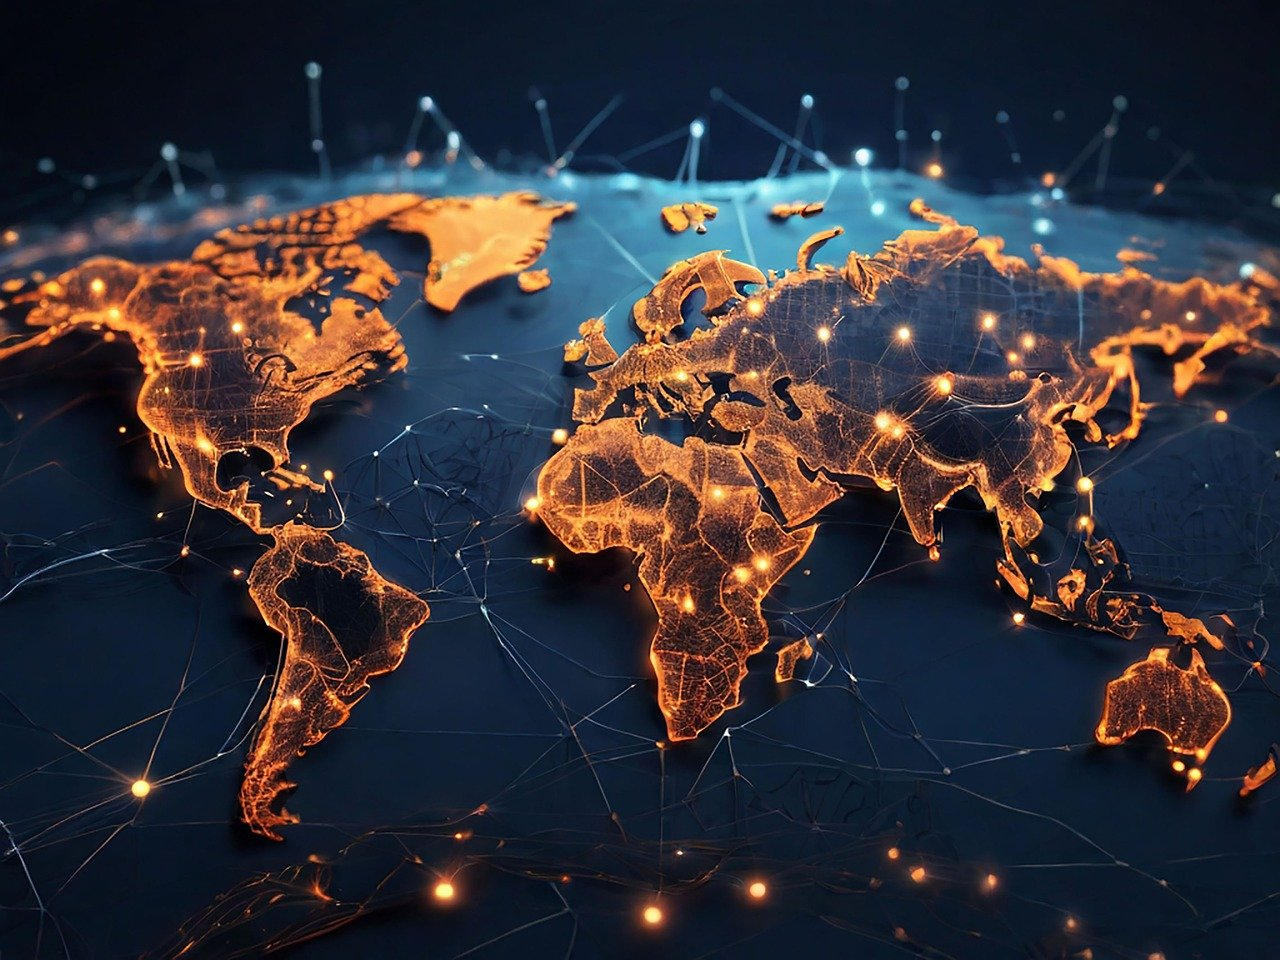


## **BASES DE DADOS** ✍

1. https://www.kaggle.com/datasets/sansuthi/gapminder-internet (acesso a internet no mundo em 2022).

2. https://sidra.ibge.gov.br/tabela/7302 (Pesquisa Nacional por Amostra de Domicílios do IBGE em 2022 a 2023).

3. https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023/code (Mercado de trabalho e perfil das pessoas que conseguiram vagas em tech em 2023).

## **PERGUNTAS** 🌎

1. Qual o indice de acesso a internet por país?

2. Qual a média de acessos da população brasileira por estado da federação a internet?

3. Média de quantos computadores existem por domicilio em cada região do Brasil?

4. Qual o perfil socioeconomico dos brasileiros que conseguiram vagas em tech em 2023, por estado?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Para entender melhor os dados que temos, a distribuição deles e seus tipos, vamos verificar suas colunas e tamanho. Depois vamos limpar o necessário.

## BASE 1 - GAPMINDER

In [ ]:
# Nomeando dataframe da ONG GAPMINDER
df_internet= pd.read_csv('gapminder_internet.csv', encoding='latin1')

# Visualização das dez primeiras linhas do dataframe
df_internet.head(10)

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
6,Argentina,10749.419240,36.000335,92.00
7,Armenia,1326.741757,44.001025,63.86
8,Aruba,NaN,41.800889,46.78
9,Australia,25249.986060,75.895654,88.74


## BASE 2 - IBGE

In [ ]:
# A base de dados do IBGE "tabela7302" estava em xlsx, para utilizar ele, subimos o arquivo no colab e convertemos em csv. Esta tabela é sobre a quantidade de notebooks e tablets no Brasil por domicilio.

# Carregue o arquivo XLSX
df_dispositivo_per_capto = pd.read_excel('tabela7302_nv.xlsx')

# Salve como CSV
df_dispositivo_per_capto.to_csv('tabela7302_nv.csv', index=False)


In [ ]:
# Base de Dados do IBGE - Dispositivo por Região do Brasil
df_dispositivo_per_capto = pd.read_csv('tabela7302_nv.csv')

# Visualização do numero de linhas e colunas do dataframe
num_linhas = df_dispositivo_per_capto.shape[0]
num_colunas = df_dispositivo_per_capto.shape[1]
colunas = df_dispositivo_per_capto.columns.values

print(f"Número de linhas: {num_linhas} \n"
      f"Número de colunas: {num_colunas} \n"
      f"Colunas: {colunas} \n")

Número de linhas: 37 
Número de colunas: 8 
Colunas: ['Unnamed: 0' 'Unnamed: 1' '2022' 'Unnamed: 3' 'Unnamed: 4' '2023'
 'Unnamed: 6' 'Unnamed: 7'] 



In [ ]:
# Visualização das dez primeiras linhas do dataframe IBGE
df_dispositivo_per_capto.head(10)


,Unnamed: 0,Unnamed: 1,2022,Unnamed: 3,Unnamed: 4,2023,Unnamed: 6,Unnamed: 7
0,Brasil e Região,Existência de microcomputador ou tablet no dom...,Total_2022,Urbana_2022,Rural_2022,Total_2023,Urbana_2023,Rural_2023
1,Brasil,Total,75323,65831,9493,78322,68852,9470
2,Brasil,Havia microcomputador ou tablet,31887,30494,1392,32118,30810,1308
3,Brasil,Havia microcomputador,30271,29031,1240,30561,29397,1164
4,Brasil,Havia tablet,8090,7795,295,8118,7850,268
5,Brasil,Havia microcomputador e tablet,6475,6332,143,6560,6436,124
6,Brasil,Não havia microcomputador nem tablet,43437,35336,8100,46204,38042,8162
7,Norte,Total,5739,4592,1148,6024,4873,1151
8,Norte,Havia microcomputador ou tablet,1716,1627,89,1766,1675,92
9,Norte,Havia microcomputador,1606,1528,78,1672,1589,83


In [ ]:
# Quantidade de nulos por coluna IBGE
print("Valores nulos por coluna do dataframe:")
print(df_dispositivo_por_regiao.isnull().sum())

Valores nulos por coluna do dataframe:
Unnamed: 0    0
Unnamed: 1    0
2022          0
Unnamed: 3    0
Unnamed: 4    0
2023          0
Unnamed: 6    0
Unnamed: 7    0
dtype: int64


## BASE 3 - MERCADO DE TRABALHO TECH

In [ ]:
df_mercado_tech= pd.read_csv('State_of_data_BR_2023.csv', encoding='latin1')

## **LIMPEZA DOS DADOS**

Agora que temos algumas informações sobre os dataframes, podemos aplicar a limpeza. Para não prejudicar os dados originais e termos mais liberdade ao modifica-los, criamos um dataframe para manipulação, utilizando a função `.copy()`.



## GAPMINDER

In [ ]:
# Criação da copia do dataframe - GAPMINDER
dataframe_copia = df_internet.copy()

In [ ]:
# Renomeando as colunas existentes - GAPMINDER
df_internet_renomeado = df_internet.rename(columns={'country': 'País', 'incomeperperson': 'Renda_per_Capta',  'internetuserate': 'Taxa_Acesso_Internet',  'urbanrate': 'Taxa_Urbanização'})

colunas_atualizadas = df_internet_renomeado.columns.values

print(f"Colunas Atualizadas: {colunas_atualizadas}")

Colunas Atualizadas: ['País' 'Renda_per_Capta' 'Taxa_Acesso_Internet' 'Taxa_Urbanização']


In [ ]:
#contando a quantidade de valores nulos  - GAPMINDER
df_internet_renomeado.isnull().sum()

,0
País,0
Renda_per_Capta,23
Taxa_Acesso_Internet,21
Taxa_Urbanização,10


In [ ]:
# Exclusão de Nulos - GAPMINDER
df_internet_renomeado.dropna(inplace=True)
print("Valores nulos removidos!")

Valores nulos removidos!


In [ ]:
# Exclusão de linhas duplicadas  - GAPMINDER
df_internet_renomeado.drop_duplicates(inplace=True)
print(f"Linhas duplicadas: {df_internet_renomeado.duplicated().sum()}")

Linhas duplicadas: 0


In [ ]:
df_internet_renomeado

,País,Renda_per_Capta,Taxa_Acesso_Internet,Taxa_Urbanização
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
...,...,...,...,...
207,Venezuela,5528.363114,35.850437,93.32
208,Vietnam,722.807559,27.851822,27.84
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


## IBGE



In [ ]:
# Criação da copia do dataframe - IBGE
dataframe_copia = df_dispositivo_per_capto.copy()

# Exclusão de linhas duplicadas
dataframe_copia.drop_duplicates(inplace=True)
print("Linhas duplicadas removidas!")


Linhas duplicadas removidas!


In [ ]:
# Renomeando as colunas existentes - IBGE
dataframe_renomeado = dataframe_copia.rename(columns={'Unnamed: 0': 'Localidade', 'Unnamed: 1': 'Dispositivo',  '2022': 'Total_2022',  'Unnamed: 3': 'Zonaurbana_2022', 'Unnamed: 4': 'Zonarural_2022', '2023': 'Total_2023', 'Unnamed: 6': 'Zonaurbana_2023', 'Unnamed: 7': 'Zonarural_2023' })

colunas_atualizadas = dataframe_renomeado.columns.values

print(f"Colunas Atualizadas: {colunas_atualizadas}")

Colunas Atualizadas: ['Localidade' 'Dispositivo' 'Total_2022' 'Zonaurbana_2022'
 'Zonarural_2022' 'Total_2023' 'Zonaurbana_2023' 'Zonarural_2023']


In [ ]:
#Exclusão de linha "do índice 0", onde supostamente estão nomeadas as colunas - IBGE
dataframe_renomeado.drop(0, axis=0)

,Localidade,Dispositivo,Total_2022,Zonaurbana_2022,Zonarural_2022,Total_2023,Zonaurbana_2023,Zonarural_2023
1,Brasil,Total,75323,65831,9493,78322,68852,9470
2,Brasil,Havia microcomputador ou tablet,31887,30494,1392,32118,30810,1308
3,Brasil,Havia microcomputador,30271,29031,1240,30561,29397,1164
4,Brasil,Havia tablet,8090,7795,295,8118,7850,268
5,Brasil,Havia microcomputador e tablet,6475,6332,143,6560,6436,124
6,Brasil,Não havia microcomputador nem tablet,43437,35336,8100,46204,38042,8162
7,Norte,Total,5739,4592,1148,6024,4873,1151
8,Norte,Havia microcomputador ou tablet,1716,1627,89,1766,1675,92
9,Norte,Havia microcomputador,1606,1528,78,1672,1589,83
10,Norte,Havia tablet,381,363,17,411,393,18


## MERCADO DE TRABALHO TECH

In [ ]:
# Criação da copia do dataframe - STATE
data_copia = df_mercado_tech.copy()

In [ ]:
df_mercado_tech.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 399 entries, ('P0', 'id') to ('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negÃ³cio.')
dtypes: float64(328), int64(2), object(69)
memory usage: 16.1+ MB


In [ ]:
#contando a quantidade de valores nulos - STATE
df_mercado_tech.isnull().sum()

,0
"('P0', 'id')",0
"('P1_a ', 'Idade')",0
"('P1_a_1 ', 'Faixa idade')",0
"('P1_b ', 'Genero')",0
"('P1_c ', 'Cor/raca/etnia')",0
...,...
"('P8_d_8 ', 'Utilizando ferramentas avanÃ§adas de estatÃ­stica como SAS, SPSS, Stata etc, para realizar anÃ¡lises.')",4545
"('P8_d_9 ', 'Criando e dando manutenÃ§Ã£o em ETLs, DAGs e automaÃ§Ãµes de pipelines de dados.')",4545
"('P8_d_10 ', 'Criando e gerenciando soluÃ§Ãµes de Feature Store e cultura de MLOps.')",4545
"('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluÃ§Ãµes rodam (clusters, servidores, API, containers, etc.)')",4545


In [ ]:
# Exclusão de Nulos - STATE
df_mercado_tech.dropna(inplace=True)
print("Valores nulos removidos!")

Valores nulos removidos!


In [ ]:
# Exclusão de linhas duplicadas  - STATE
df_mercado_tech.drop_duplicates(inplace=True)
print(f"Linhas duplicadas: {df_internet_renomeado.duplicated().sum()}")

Linhas duplicadas: 0


In [ ]:
colunas_atualizadas = data_copia.columns.values

print(f"Colunas Atualizadas: {colunas_atualizadas}")

Colunas Atualizadas: ["('P0', 'id')" "('P1_a ', 'Idade')" "('P1_a_1 ', 'Faixa idade')"
 "('P1_b ', 'Genero')" "('P1_c ', 'Cor/raca/etnia')" "('P1_d ', 'PCD')"
 "('P1_e ', 'experiencia_profissional_prejudicada')"
 "('P1_e_1 ', 'NÃ£o acredito que minha experiÃªncia profissional seja afetada')"
 "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor RaÃ§a Etnia')"
 "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gÃªnero')"
 "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')"
 "('P1_f ', 'aspectos_prejudicados')"
 "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')"
 "('P1_f_2', 'Senioridade das vagas recebidas em relaÃ§Ã£o Ã\xa0 sua experiÃªncia')"
 "('P1_f_3', 'AprovaÃ§Ã£o em processos seletivos/entrevistas')"
 "('P1_f_4', 'Oportunidades de progressÃ£o de carreira')"
 "('P1_f_5', 'Velocidade de progressÃ£o de carreira')"
 "('P1_f_6', 'NÃ\xadvel de cobranÃ§a no trabalho/Stress no trabalho')"
 "('P1_f_7', 'AtenÃ§Ã£o dada diante das minh

In [ ]:
"""
# Deletar colunas entre os índices 200 e 300 (considerando a posição das colunas)
df_mercado_tech.drop(df_mercado_tech.columns[16:301], axis=1, inplace=True)

# Verificar o tamanho e contagem de valores nulos no DataFrame
print(df_mercado_tech.shape)
print(df_mercado_tech.isnull().sum())

# Colunas de dados demográficos

'Faixa_Idade',
'Genero',
'Cor_Etnia',
'PCD',
'Oportunidades_Emprego',
'Senioridade_Vagas',
'Aprovacao_Processos_Seletivos',
'Vive_no_Brasil',
'Estado_Mora',
'UF_Mora',
'Regiao_Mora',
'Mudou_Estado',
'Regiao_Origem',
'Nivel_Ensino',
'Area_Formacao'

""""

## **ANÁLISE DOS DADOS**

Fizemos a limpeza dos três datasets, chegou a hora de juntarmos.

Para unir os 3 datasets usaremos a função `merge()`, precisamos entender qual é a coluna em comum entre as bases.

In [ ]:

"""
df_final = pd.merge(df_mercado_tech, df_dispositivo_per_capto, df_internet_renomeado on='nome_coluna').merge(df_consumidor, on='customer_id')
df_final
"""